In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np # linear algebra 
import warnings
warnings.filterwarnings('ignore')

### Data Pre processing

In [8]:
loan_data = pd.read_csv("loan.csv")

In [9]:
loan = loan_data

In [10]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
# number of rows in dataframe
loan.shape

(614, 13)

In [12]:
# Statistical Measurenments
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
# number of missing values in each column
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Treating with Null values 
#### Using fillna and interpolate we're going to perform cleaning on this data

In [14]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
loan.fillna(method='ffill',inplace=True)

In [16]:
loan.fillna(method='bfill',inplace=True)

In [17]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
# label encoding
loan = loan.replace({"Loan_Status":{"Y":1, "N": 0}})

In [19]:
#dependents
loan["Dependents"].value_counts()

Dependents
0     354
2     105
1     104
3+     51
Name: count, dtype: int64

In [20]:
# replacing 3+ to 4 in dependents
loan = loan.replace({"Dependents":{"3+":4}})

### Data Visualization

AttributeError: 'numpy.int64' object has no attribute 'startswith'

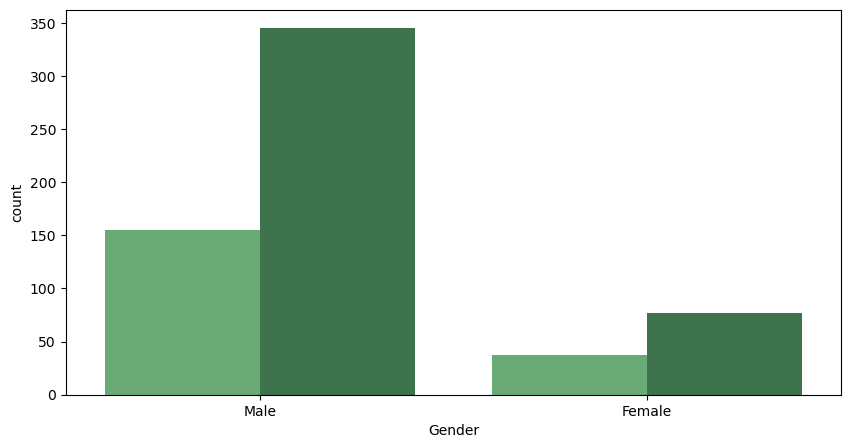

In [21]:
# gender and loan status
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=loan,hue='Loan_Status',palette='Greens_d')
plt.show()

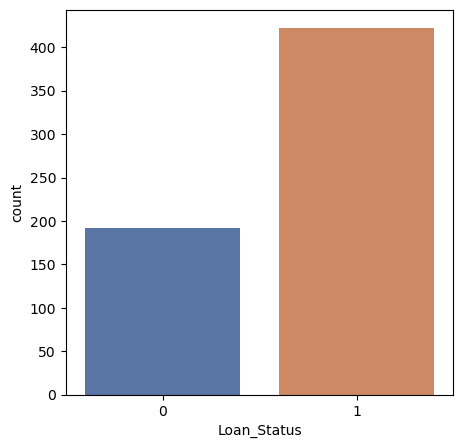

In [22]:
# loan status countplot
plt.figure(figsize=(5,5))
sns.countplot(x='Loan_Status',data=loan,palette='deep')
plt.show()

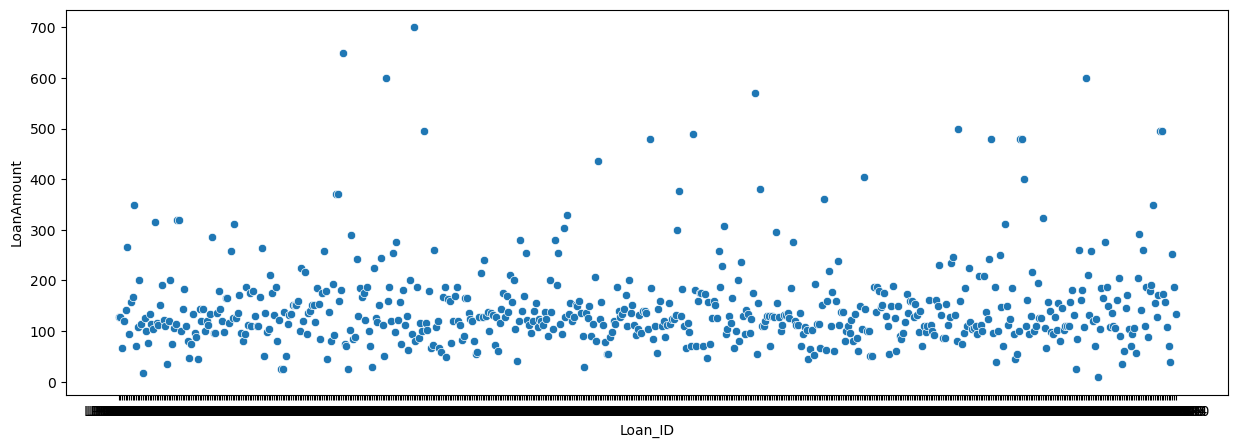

In [23]:
#scatter plot of loan id and amount
plt.figure(figsize=(15,5))
sns.scatterplot(x="Loan_ID",y="LoanAmount",data=loan)
plt.show()

<Figure size 1000x500 with 0 Axes>

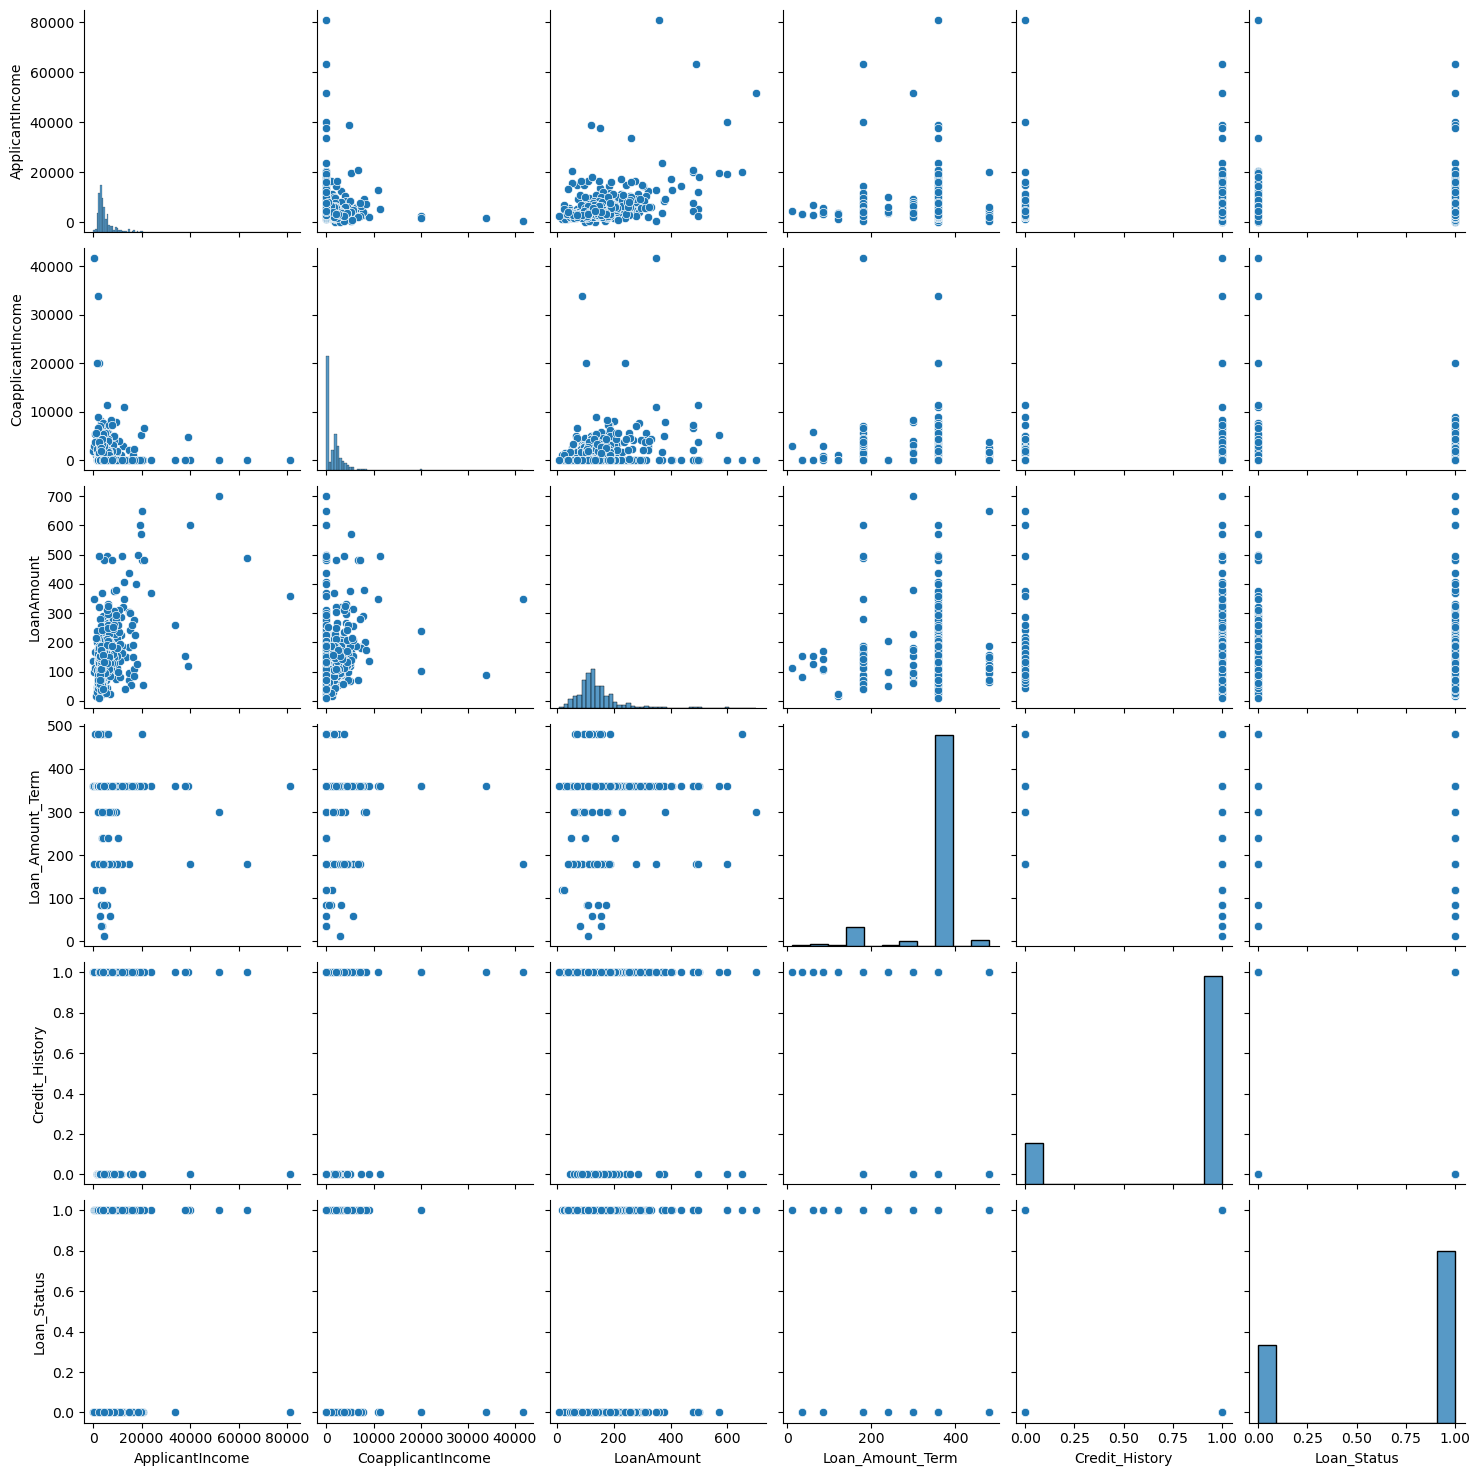

In [24]:
plt.figure(figsize=(10,5))
sns.pairplot(loan)
plt.show()

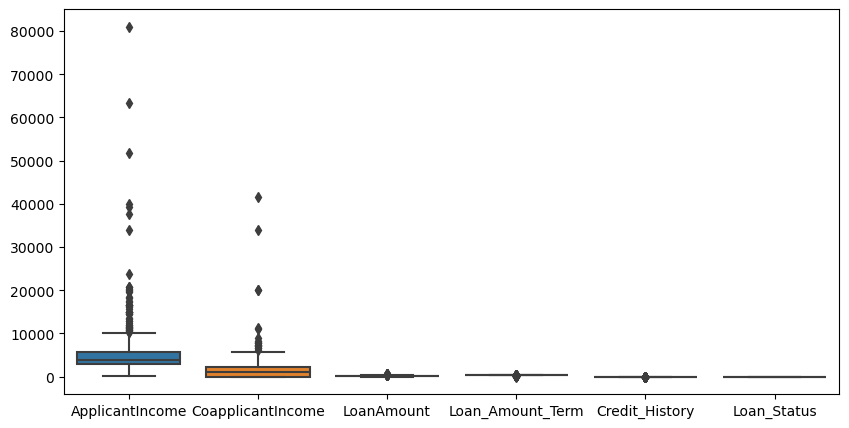

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(data=loan)
plt.show()

In [26]:
# convert categorical columns to numerical values
loan = loan.replace({"Gender":{"Male":1, "Female": 0}})
loan = loan.replace({"Married":{"Yes":1, "No": 0}})
loan = loan.replace({"Education":{"Graduate":1, "Not Graduate": 0}})
loan = loan.replace({"Self_Employed":{"Yes":1, "No": 0}})
loan = loan.replace({"Property_Area":{"Urban":2, "Rural": 0, "Semiurban":1}})

In [27]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [28]:
loan.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

#### Separating the data and target variable.

In [29]:
X = loan. drop(columns= ["Loan_ID","Loan_Status"], axis = 1)
Y = loan["Loan_Status"]

In [30]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [31]:
loan = loan.drop('Loan_ID', axis=1)

In [32]:
# Checking Multicollinearity
correlation_matrix = loan.corr()
print(correlation_matrix)

                     Gender   Married  Dependents  Education  Self_Employed  \
Gender             1.000000  0.371532    0.156031  -0.049480       0.011676   
Married            0.371532  1.000000    0.308732  -0.014097      -0.000257   
Dependents         0.156031  0.308732    1.000000  -0.058366       0.036554   
Education         -0.049480 -0.014097   -0.058366   1.000000       0.008734   
Self_Employed      0.011676 -0.000257    0.036554   0.008734       1.000000   
ApplicantIncome    0.046230  0.049052    0.131576   0.140760       0.122728   
CoapplicantIncome  0.086991  0.077760    0.031691   0.062290      -0.021807   
LoanAmount         0.100475  0.133471    0.151904   0.151763       0.099519   
Loan_Amount_Term  -0.080085 -0.099170   -0.088921   0.080674      -0.035485   
Credit_History    -0.008501  0.007358   -0.071697   0.084637      -0.010803   
Property_Area     -0.019854  0.004415   -0.007517   0.065243      -0.037106   
Loan_Status        0.012213  0.089072   -0.008747   

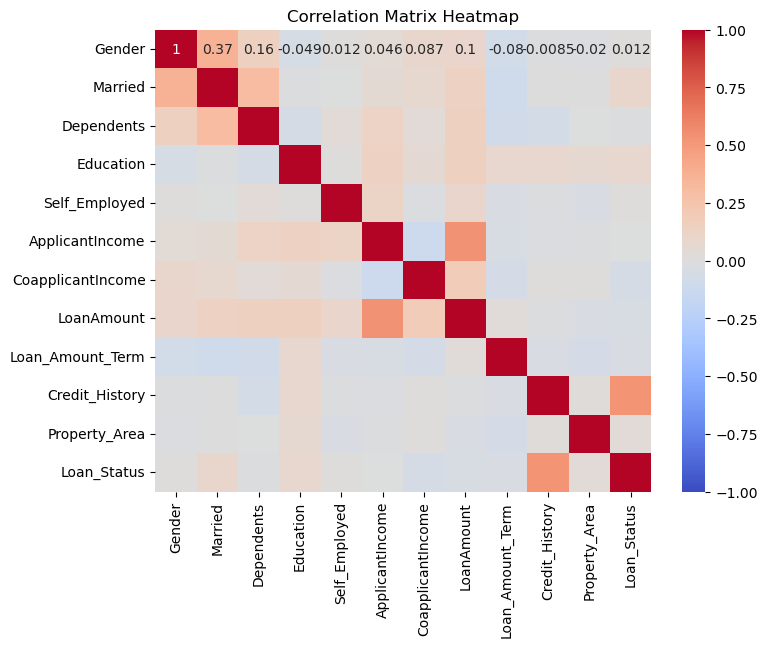

In [33]:
#heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

##### None of the predictor variables have very high multicollinearity.

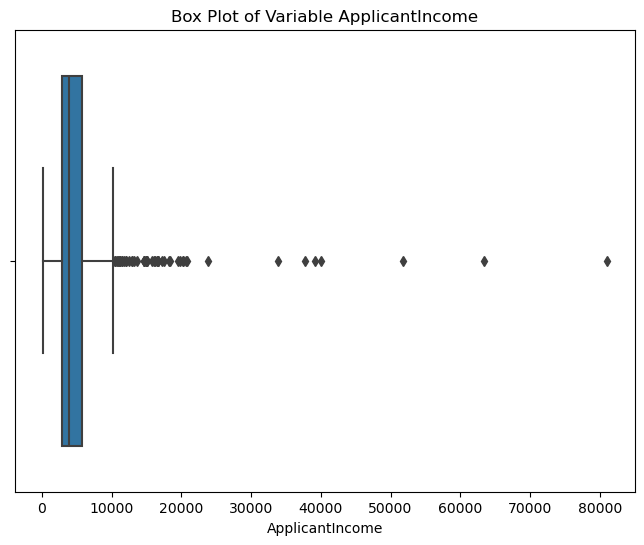

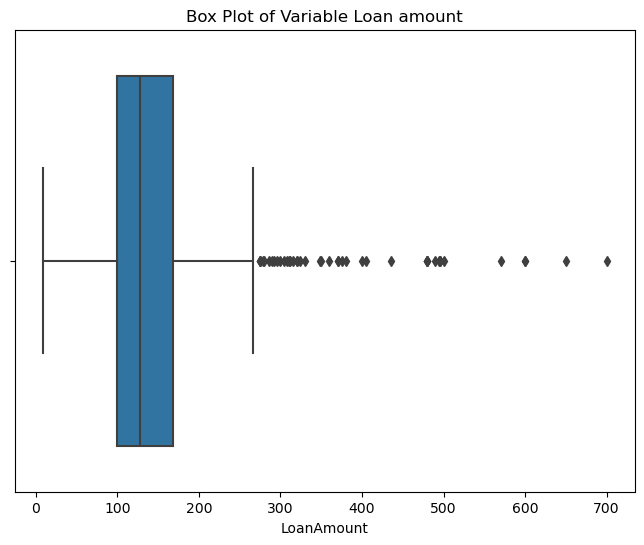

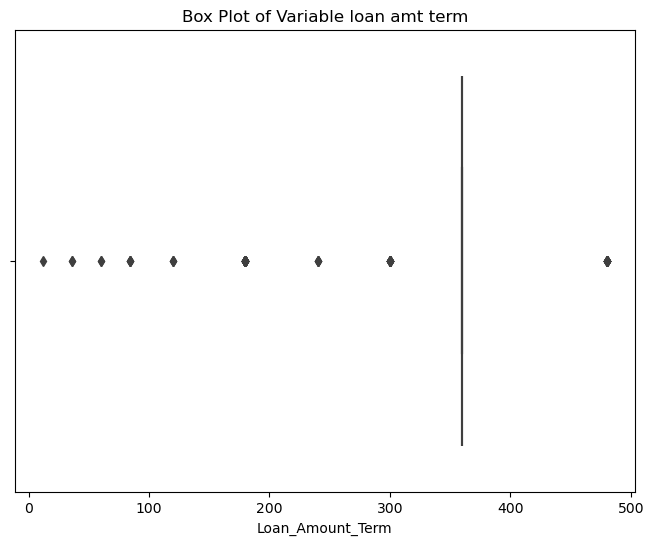

In [34]:
# boxplot for Outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=loan['ApplicantIncome'])
plt.title('Box Plot of Variable ApplicantIncome')
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x=loan['LoanAmount'])
plt.title('Box Plot of Variable Loan amount')
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x=loan['Loan_Amount_Term'])
plt.title('Box Plot of Variable loan amt term')
plt.show()

In [35]:
# Removing outliers
# using IQR method to remove outliers
# Calculate IQR
Q1 = loan['ApplicantIncome'].quantile(0.25)
Q3 = loan['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
loan_cleaned = loan[(loan['ApplicantIncome'] >= lower_bound) & (loan['ApplicantIncome'] <= upper_bound)]
print(loan_cleaned)

# Calculate IQR
Q1 = loan['LoanAmount'].quantile(0.25)
Q3 = loan['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
loan_cleaned = loan[(loan['LoanAmount'] >= lower_bound) & (loan['LoanAmount'] <= upper_bound)]
print(loan_cleaned)

# Calculate IQR
Q1 = loan['Loan_Amount_Term'].quantile(0.25)
Q3 = loan['Loan_Amount_Term'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
loan_cleaned = loan[(loan['Loan_Amount_Term'] >= lower_bound) & (loan['Loan_Amount_Term'] <= upper_bound)]
print(loan_cleaned)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [36]:
loan_cleaned.shape

(521, 12)

In [37]:
loan = loan_cleaned

In [38]:
loan.shape

(521, 12)

#### Splitting Data into train and test

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, stratify = Y, random_state= 2)
# size = 0.1 means we want test data to be 10 percent of the whole data
# uing stratify so that the labels are distributed in train and test data in same proportion

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (552, 11) (62, 11)


## Training the model.

In [41]:
# Support Vector Machine Model
classifier = svm.SVC(kernel = "linear")

In [ ]:
# Training the SVM Model
classifier.fit(X_train,Y_train)

### Model Evaluation

In [ ]:
# accuracy score on training sets
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("Accuracy score of SVM Model:" , training_data_accuracy)

#### accuracy score is pretty good.

#### Evaluating model on test data

In [234]:
# accuracy score on test sets
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy score of SVM Model:" , test_data_accuracy)

Accuracy score of SVM Model: 0.7903225806451613


#### accuracy score is pretty good on test data too.

#### Logistic Regression Model

In [235]:
# train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=200)

#### evaluating the model

In [236]:
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(Y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 0.7741935483870968
Confusion Matrix:
[[ 9 10]
 [ 4 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.47      0.56        19
           1       0.80      0.91      0.85        43

    accuracy                           0.77        62
   macro avg       0.74      0.69      0.71        62
weighted avg       0.76      0.77      0.76        62



#### Almost 77.5 percent accuracy.

## Random Forest Model.

In [237]:
# train the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

### Evaluate the model.

In [238]:
y_pred2 = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred2)
print(f'Accuracy: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred2)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(Y_test, y_pred2)
print('Classification Report:')
print(class_report)


Accuracy: 0.7419354838709677
Confusion Matrix:
[[10  9]
 [ 7 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.53      0.56        19
           1       0.80      0.84      0.82        43

    accuracy                           0.74        62
   macro avg       0.69      0.68      0.69        62
weighted avg       0.74      0.74      0.74        62



#### Almost 74.19 percent accuracy.

In [239]:
from sklearn.linear_model import LogisticRegression 
m1=LogisticRegression()
m1.fit(X_train,Y_train)
yp1=m1.predict(X_test)


from sklearn.tree import DecisionTreeClassifier
m2=DecisionTreeClassifier()
m2.fit(X_train,Y_train)
yp2=m2.predict(X_test)

### Accuracy of two models ( LogisticRegression and DecisionTree )
#### Finfing the best model..........

In [241]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix 
print("Logistic Regression :")
print(" accuracy is ",accuracy_score(Y_test,yp1))
print(" precision score is ",precision_score(Y_test,yp1))
print(" recall is ",recall_score(Y_test,yp1))
print(" f1 score is ",f1_score(Y_test,yp1))
print("                                                                                                              ")
print(" classification report is ",classification_report(Y_test,yp1))
print(" confusion matrix is ",confusion_matrix(Y_test,yp1))

Logistic Regression :
 accuracy is  0.7741935483870968
 precision score is  0.7959183673469388
 recall is  0.9069767441860465
 f1 score is  0.8478260869565216
                                                                                                              
 classification report is                precision    recall  f1-score   support

           0       0.69      0.47      0.56        19
           1       0.80      0.91      0.85        43

    accuracy                           0.77        62
   macro avg       0.74      0.69      0.71        62
weighted avg       0.76      0.77      0.76        62

 confusion matrix is  [[ 9 10]
 [ 4 39]]


In [242]:
print("Decision Tree Classifier :")
print(" accuracy is ",accuracy_score(Y_test,yp2))
print(" precision score is ",precision_score(Y_test,yp2))
print(" recall is ",recall_score(Y_test,yp2))
print(" f1 score is ",f1_score(Y_test,yp2))
print("                                                                                                              ")
print(" classification report is ",classification_report(Y_test,yp2))
print(" confusion matrix is ",confusion_matrix(Y_test,yp2))

Decision Tree Classifier :
 accuracy is  0.6935483870967742
 precision score is  0.8
 recall is  0.7441860465116279
 f1 score is  0.7710843373493975
                                                                                                              
 classification report is                precision    recall  f1-score   support

           0       0.50      0.58      0.54        19
           1       0.80      0.74      0.77        43

    accuracy                           0.69        62
   macro avg       0.65      0.66      0.65        62
weighted avg       0.71      0.69      0.70        62

 confusion matrix is  [[11  8]
 [11 32]]


#### Desicion tree accuracy is 69.35%.

In [243]:
print("Logistic Regression :")
print(" accuracy is ",accuracy_score(Y_test,yp1))
print(" precision score is ",precision_score(Y_test,yp1))
print(" recall is ",recall_score(Y_test,yp1))
print(" f1 score is ",f1_score(Y_test,yp1))
print("***********************************************************************************************************")
print("Decision Tree Classifier :")
print(" accuracy is ",accuracy_score(Y_test,yp2))
print(" precision score is ",precision_score(Y_test,yp2))
print(" recall is ",recall_score(Y_test,yp2))
print(" f1 score is ",f1_score(Y_test,yp2))

Logistic Regression :
 accuracy is  0.7741935483870968
 precision score is  0.7959183673469388
 recall is  0.9069767441860465
 f1 score is  0.8478260869565216
***********************************************************************************************************
Decision Tree Classifier :
 accuracy is  0.6935483870967742
 precision score is  0.8
 recall is  0.7441860465116279
 f1 score is  0.7710843373493975


In [244]:
print("Logistic Regression Predictions ",yp1)
print("*****************************************************************************************************************")
print("Decision Tree predictions ",yp2)

Logistic Regression Predictions  [1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1]
*****************************************************************************************************************
Decision Tree predictions  [1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1
 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1]


#### Final accuracies of two models are :

In [245]:
print("For Logistic Regression :")
print(" accuracy is ",accuracy_score(Y_test,yp1))
print("For Decision tree :")
print(" accuracy is ",accuracy_score(Y_test,yp2))

For Logistic Regression :
 accuracy is  0.7741935483870968
For Decision tree :
 accuracy is  0.6935483870967742


### Hence Decision Tree performs with less accuracy than LogisticRegression 